# Homework 1 (Dev Mody)
## Exercise 3 : Implementing the Random Search Algorithm

In this exercise, you will implement a version of the random search algorithm. Your Python routine should take several arguments, so the beginning of your function should look like this:

### Random Search Function

```python
def random_search(g, alpha_choice, max_its, w, num_samples):
    # run random search
    w_history = []  # container for w history
    cost_history = []  # container for corresponding cost function history
    alpha = 0
    for k in range(1, max_its + 1):
        # check if diminishing step length rule used
        if alpha_choice == 'diminishing':
            alpha = 1 / float(k)
        else:
            alpha = alpha_choice
        # TODO: record weights and cost history
        # TODO: construct num_sample random unit vectors
        # TODO: construct num_sample new w_candidates
        # TODO: pick the best among them using argmin
        # TODO: decide on a decent direction and take a step
        weight_history.append(w)
        cost_history.append(g(w))
    return w_history, cost_history
```

Here:
- `g` is the function you're trying to minimize
- `alpha_choice` is the step length/learning rate, which can take 2 values:
    - The string `'diminishing'`
    - Or a numerical constant
- `max_its` is the maximum number of iterations to be taken.
- `w` is the starting vector.
- `num_samples` is the number of random directions that we choose for each iteration.

In addition, we would like to be able to monitor the progression of the algorithm. Therefore, you should keep track of the points the algorithm visits in `w_history`, as well as the associated cost in `cost_history`. By "cost," we simply mean the value the function `g(w)` has at the point we’re currently at.

Please keep these names for easier marking. These two containers (`w_history` and `cost_history`) should be returned by the function as shown.

### 3.1: Implementing Random Search

Finish the above implementation of `random_search`. You should normalize the directions and use `alpha` as step length. If directions contain all the generated and normalized directions you should be able to generate all the candidates(`w_candidates`) for new points simply by using `w_candidates = w + alpha*directions`. Try to find an efficient way for evaluating the function in all the points, `w_candidates`. You can do all this simply by following what you did in the preceeding exercise.

ANSWER: The implementation of `random_search` is as follows

In [1]:
import numpy as np

def random_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    w_history = []         # container for w history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        # TODO: record weights and cost history
        w_history.append(w)
        cost_history.append(g(w))
        # TODO: construct num_sample random unit vectors
        directions = np.random.randn(num_samples,len(w))
        psum = np.sum(directions*directions,axis=1)
        norms = np.sqrt(psum)
        directions = directions / norms[:, np.newaxis]
        # TODO: construct num_sample new w_candidates
        w_candidates = np.array([g(w + alpha*v) for v in directions])
        # TODO: pick the best among them using argmin
        index = np.argmin(w_candidates)
        # TODO: decide on a decent direction and take a step
        w = w + alpha*directions[index]
    w_history.append(w)
    cost_history.append(g(w))
    return w_history,cost_history

### 3.2: Testing it out

Now we want to test the random search function. We want to find the minimum of the function wich is simply:

$$ g(\vec{w}) = \vec{w}^T \vec{w} + 2 = \vec{w} \cdot \vec{w} + 2 $$

in Python we can implement this in a straight forward manner as shown below. In addition, we start the search with the following parameters:

```python
g = lambda w: np.dot(w.T,w) + 2
alpha_choice = 1; w = np.array([3,4]); num_samples = 1000; max_its = 5;
```

Here, `w = np.array([3,4])` specify the starting point for the minimization. Show plots of the resulting w history,cost history. We have already seen how you can plot cost history in the first exercise. There is also a simple way of plotting `w_history`. You can do this using:

```python
static_plotter.two_input_surface_contour_plot(g,w_history,view = [10,30],xmin = ..., xmax = ..., ymin = ..., ymax = ..., num_contours=20)
```

where you have to fill in reasonable values for `xmin` etc

ANSWER: The implementation for running Local Optimization using Random Search using an arbitrary function `g`, visualizing the weight history using Contour Plots and visualizing the cost history using a simple plot is as follows

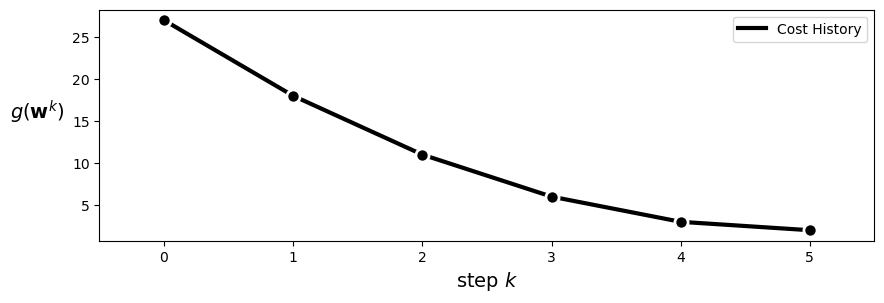

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

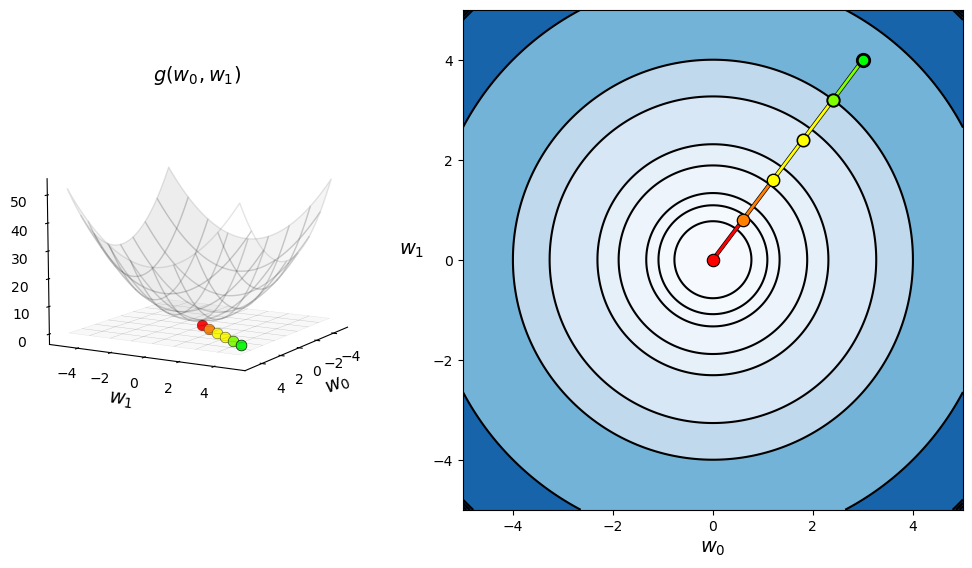

In [2]:
import sys
sys.path.append('homeworks/homework1/MLRPlotting')
import matplotlib.pyplot as plt
from MLRPlotting import static_plotter

g = lambda w: np.dot(w.T,w) + 2
alpha_choice = 1
num_samples = 1000
max_its = 5
w = np.array([3,4])
w_history, cost_history = random_search(g,alpha_choice,max_its,w,num_samples)
static_plotter = static_plotter.Visualizer();
static_plotter.plot_cost_histories([cost_history], start=0, points=True,labels=[r'Cost History'])
static_plotter.two_input_surface_contour_plot(g, w_history, view=[10, 30], xmin=-5, xmax=5, ymin=-5, ymax=5, num_contours=20)

### 3.3 Analysis of Other Steplengths

Repeat the analysis but with a steplength of `alpha=0.3`. Did the results improve ? Explain your results.

ANSWER: The results deteriorated when a steplength of `alpha=0.3` was chosen. This outcome is attributed to the limited number of iterations (only 5), which, combined with such a small steplength, reduces the likelihood of reaching the global minimum, especially when starting from the weight vector (3, 4). Typically, there is a tradeoff between adjusting the steplength and the number of iterations, balancing accuracy and computational costs. For example, using large steplengths with a small number of iterations may result in less accurate weight vectors due to the potential for overshooting, but it is computationally inexpensive. Conversely, small steplengths with a large number of iterations increase the chances of reaching the global minimum but are computationally expensive. In this scenario, significantly more than 5 iterations would be required to approach the minimum effectively.

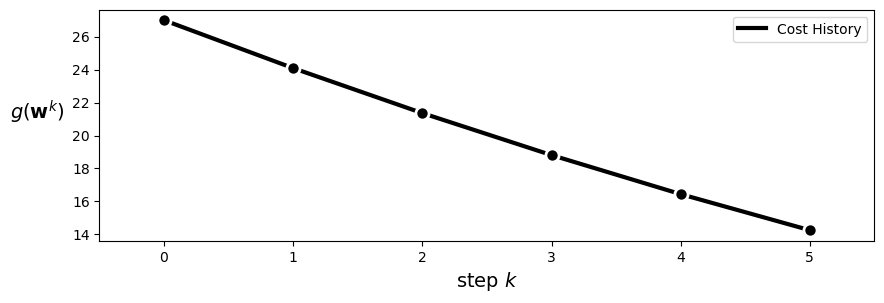

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

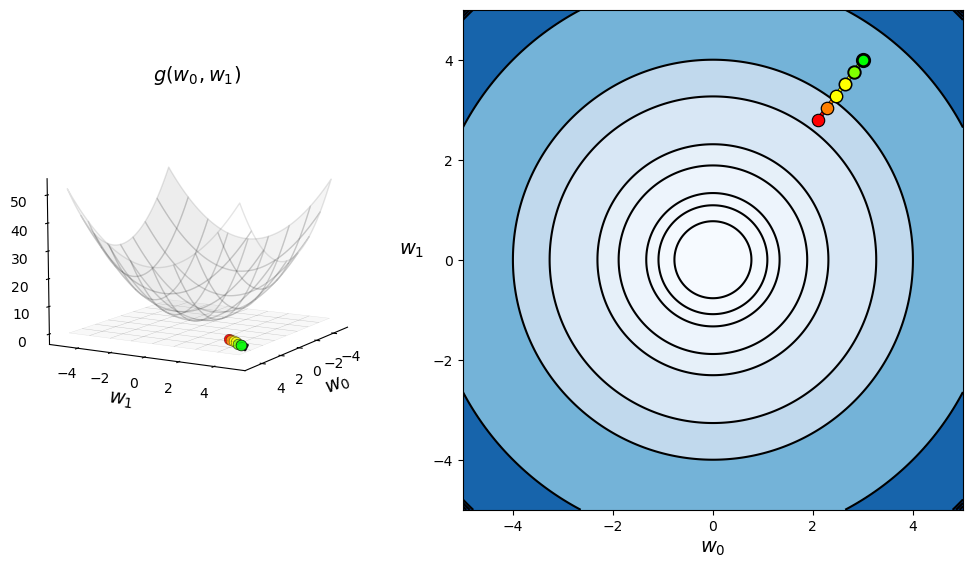

In [3]:
import sys
sys.path.append('homeworks/homework1/MLRPlotting')
import matplotlib.pyplot as plt
from MLRPlotting import static_plotter

g = lambda w: np.dot(w.T,w) + 2
alpha_choice = 0.3
num_samples = 1000
max_its = 5
w = np.array([3,4])
w_history, cost_history = random_search(g,alpha_choice,max_its,w,num_samples)
static_plotter = static_plotter.Visualizer();
static_plotter.plot_cost_histories([cost_history], start=0, points=True, labels=[r'Cost History'])
static_plotter.two_input_surface_contour_plot(g, w_history, view=[10, 30], xmin=-5, xmax=5, ymin=-5, ymax=5, num_contours=20)

### 3.4: Rosenbrock Banana Function

Next we want to study a function in two dimensions with a very long, narrow and curved valley, the Rosenbrock Banana function:

$$ g(w_1, w_2) = 100(w_2 - w_1^2) + (w_1 - 1)^2 $$

The function has a minimum of $(w_1, w_2) = (1, 1)$. Make two runs with `num_samples = 1000; max_its = 50`, starting from the point (-2, -2). First run with a fixed step length of $\alpha = 1$ then with a diminishing steplength of $\alpha = 1/k$. Compare the first two runs by plotting the `cost_history`. Also make contour plots of $g(w_1,w_2)$ with an overlapped `w_history`.

ANSWER: The experiment conducted with the Rosenbrock Banana function, starting from the point (-2, -2), highlights the differences in performance between fixed and diminishing step length strategies in a challenging optimization landscape. The fixed step length ($\alpha = 1$) initially shows rapid progress but tends to oscillate and struggle to converge precisely to the minimum at (1, 1) due to the function's long, narrow, and curved valley. This oscillation is evident in the cost history plot, where the cost function values fluctuate significantly before stabilizing. In contrast, the diminishing step length ($\alpha = 1/k$) demonstrates a more controlled and steady convergence. The cost history for this run shows a smoother and more consistent decrease in the cost function value, reflecting the algorithm's ability to fine-tune its steps as it approaches the minimum. The contour plots further illustrate these behaviors: the fixed step length path appears more erratic with larger jumps, while the diminishing step length path follows a more precise and directed trajectory towards the minimum. Overall, the diminishing step length proves to be more effective for navigating the complex geometry of the Rosenbrock function, ensuring better convergence to the optimal solution.



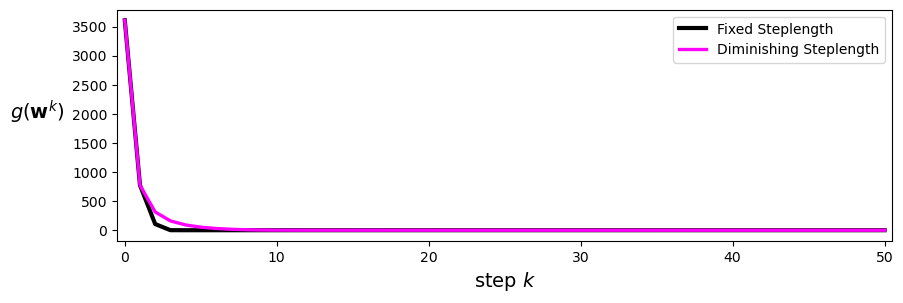

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

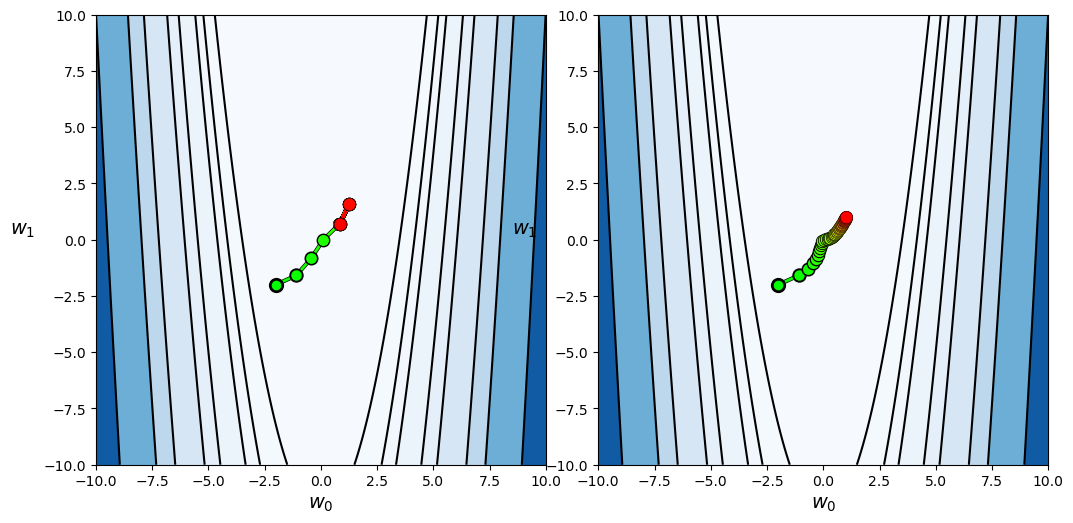

In [4]:
import sys
sys.path.append('homeworks/homework1/MLRPlotting')
import matplotlib.pyplot as plt
from MLRPlotting import static_plotter

g = lambda w: 100*((w[1]-(w[0]**2))**2) + (w[0]-1)**2
num_samples = 1000
max_its = 50
w_fixed = ([-2, -2])
w_diminish = ([-2, -2])

w_history_fixed, cost_history_fixed = random_search(g, 1, max_its, w_fixed, num_samples)
w_history_diminishing, cost_history_diminishing = random_search(g, "diminishing", max_its, w_diminish, num_samples)

static_plotter = static_plotter.Visualizer()
static_plotter.plot_cost_histories([cost_history_fixed, cost_history_diminishing], start=0, points=False, labels=[r'Fixed Steplength', r'Diminishing Steplength'])
static_plotter.compare_runs_contour_plots(g, [w_history_fixed, w_history_diminishing], view=[10, 30], xmin=-10, xmax=10, ymin=-10, ymax=10, num_contours=20)

### 3.5: Six-Hump Camel Function

Now let’s try something a little more challenging, the six-hump camel function: $$g(w_1, w_2) = (4 - 2.1w_1^2 + w_1^4/3)w_1^2 + w_1w_2 + (4w_2^2 - 4)w_2^2$$
In the domain, $w_1 \in [-3, 3], w_2 \in [-2, 2]$, $g$ has 2 global minima $(0.0898, −0.7126), (−0.0898, 0.7126)$. Select a starting point and use random search to locate the minima. Do you converge to the global minima or stuck elsewhere?

ANSWER: The experiment with the six-hump camel function using random search starting from the point (0, 0) provides insights into the algorithm's performance in locating the global minima. The cost history plot shows a gradual decrease in the cost function value, indicating that the algorithm is making progress towards minimizing the function. However, the final result suggests that the algorithm may not have converged to one of the global minima at $(0.0898, -0.7126)$ or $(-0.0898, 0.7126)$. Instead, it might have gotten stuck in a local minimum or a flat region of the function, which is common in complex optimization landscapes like the six-hump camel function. The contour plot with the overlapped path of `w_history` visually confirms this, showing that the algorithm explored the parameter space but did not reach the global minima within the given number of iterations. This outcome highlights the importance of tuning parameters such as the step length and the number of iterations, as well as potentially using more sophisticated optimization techniques to navigate challenging functions with multiple minima.

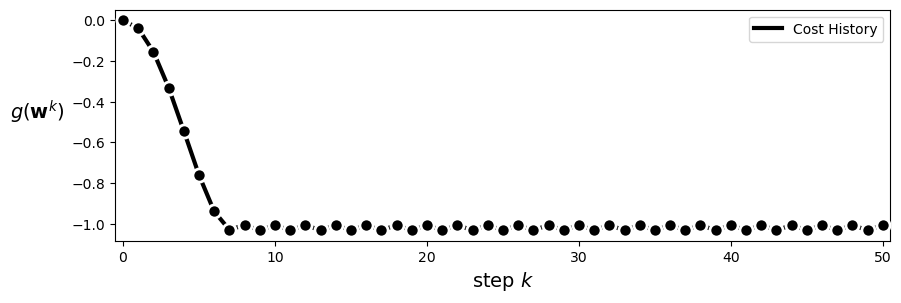

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

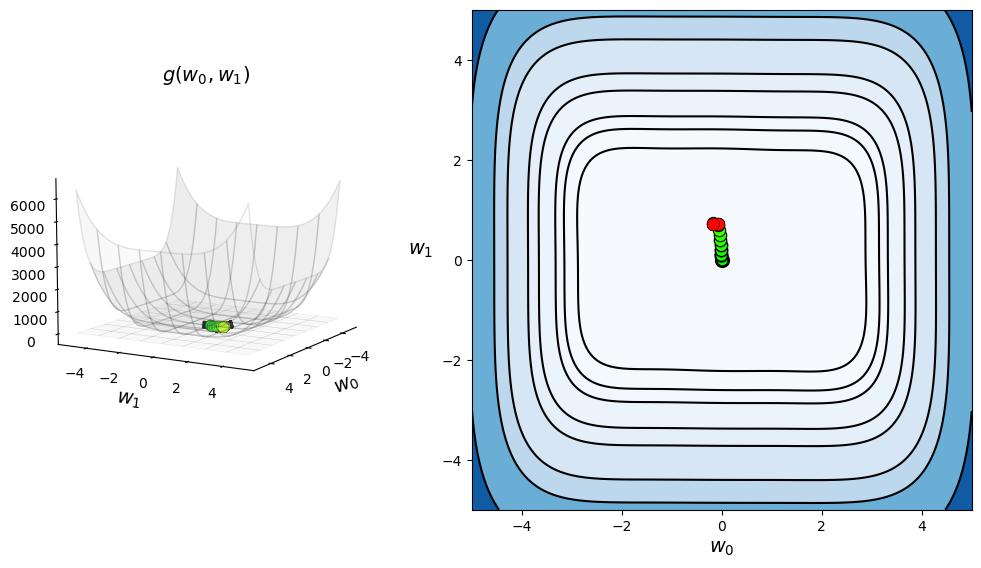

In [5]:
import sys
sys.path.append('homeworks/homework1/MLRPlotting')
import matplotlib.pyplot as plt
from MLRPlotting import static_plotter

g = lambda w: (4-2.1*(w[0]**2)+((w[0]**4)/3))*(w[0]**2) + w[0]*w[1] + (-4+4*(w[1]**2))*(w[1]**2)
num_samples = 1000
max_its = 50
w = ([0, 0])
w_history, cost_history = random_search(g,0.1,max_its,w,num_samples)

static_plotter = static_plotter.Visualizer()
static_plotter.plot_cost_histories([cost_history], start=0, points=True, labels=[r'Cost History'])
static_plotter.two_input_surface_contour_plot(g, w_history, view=[10, 30], xmin=-5, xmax=5, ymin=-5, ymax=5, num_contours=20)